# Challenge : predict conversions 🏆🏆

## Import Librairies

In [28]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [29]:
dataset = pd.read_csv('conversion_data_train.csv')
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [30]:
dataset.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [31]:
dataset.shape

(284580, 6)

In [32]:
dataset['new_user'] =  dataset['new_user'].astype(str)
dataset['new_user'] = [ 'Yes' if x == '1' else 'No' for x in dataset['new_user'] ]

In [33]:
dataset["converted"].value_counts()

0    275400
1      9180
Name: converted, dtype: int64

In [34]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,Yes,Direct,2,0
1,UK,21,Yes,Ads,3,0
2,Germany,20,No,Seo,14,1
3,US,23,Yes,Seo,3,0
4,US,28,Yes,Direct,3,0


In [35]:
dataset.groupby('country').mean()

,age,total_pages_visited,converted
country,,,
China,30.664014,4.551604,0.001288
Germany,30.457966,5.207646,0.062431
UK,30.433675,5.078985,0.052497
US,30.564450,4.931609,0.037908


In [36]:
dataset.groupby('source').mean()

,age,total_pages_visited,converted
source,,,
Ads,30.530059,4.901183,0.034801
Direct,30.550510,4.815493,0.027814
Seo,30.590183,4.884174,0.032873


In [37]:
dataset.groupby('new_user').mean()

,age,total_pages_visited,converted
new_user,,,
No,30.421722,5.282660,0.071933
Yes,30.629587,4.685378,0.014052


In [38]:
dataset.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [39]:
# The dataset is quite big : we must create a sample of the dataset before making any visualizations !
dataset_sample = dataset.sample(10000)

### some graphics

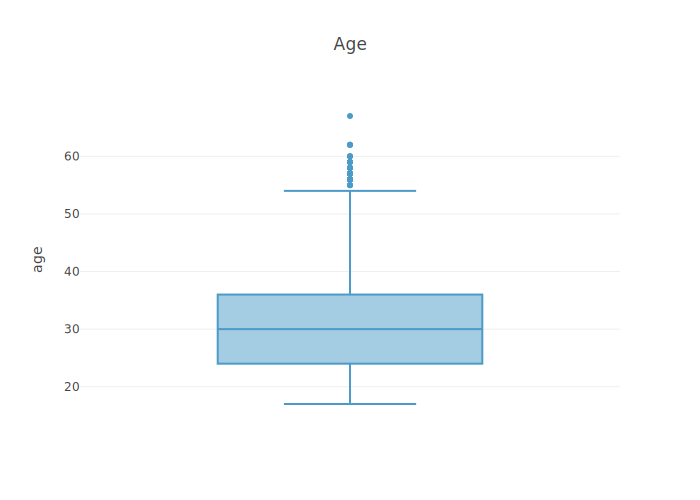

In [40]:
px.box(dataset_sample, y = 'age', title = 'Age')

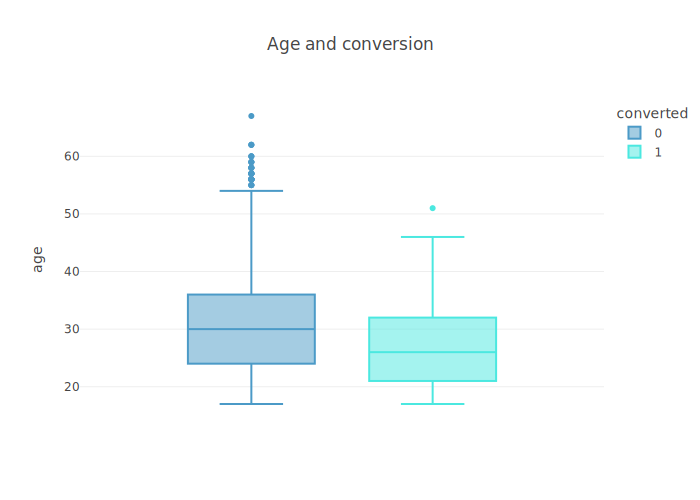

In [41]:
px.box(dataset_sample, y = 'age', color = 'converted', title = 'Age and conversion')

Text(0.5, 1.0, 'Country and conversion rate')

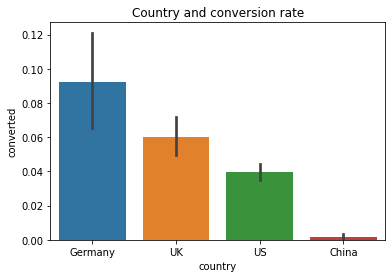

In [42]:
country_order = ["Germany", "UK", "US", "China"]
sns.barplot(x="country", y="converted", data=dataset_sample, order = country_order)
plt.title("Country and conversion rate")


Text(0.5, 1.0, 'Source and conversion rate')

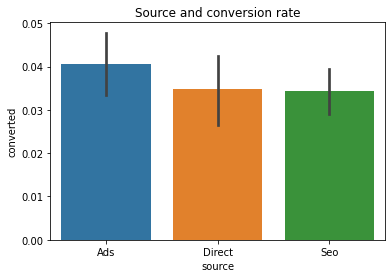

In [43]:
sns.barplot(x="source", y="converted", data=dataset_sample)
plt.title("Source and conversion rate")

Text(0.5, 1.0, 'User and conversion rate')

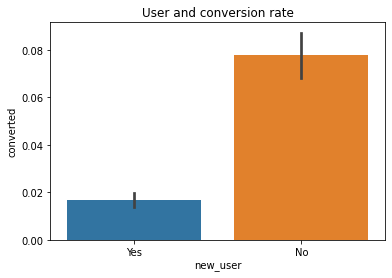

In [44]:
sns.barplot(x="new_user", y="converted", data=dataset_sample)
plt.title("User and conversion rate")

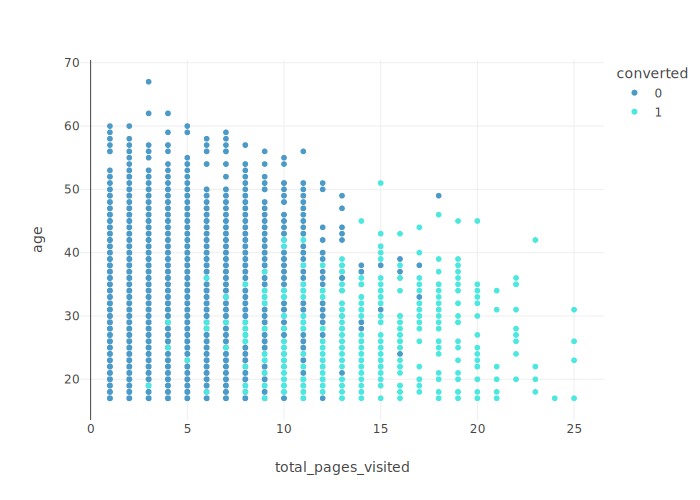

In [45]:
px.scatter(dataset_sample, x = 'total_pages_visited', y = 'age', color = dataset_sample['converted'].astype('str'), labels = {'color': 'converted'})

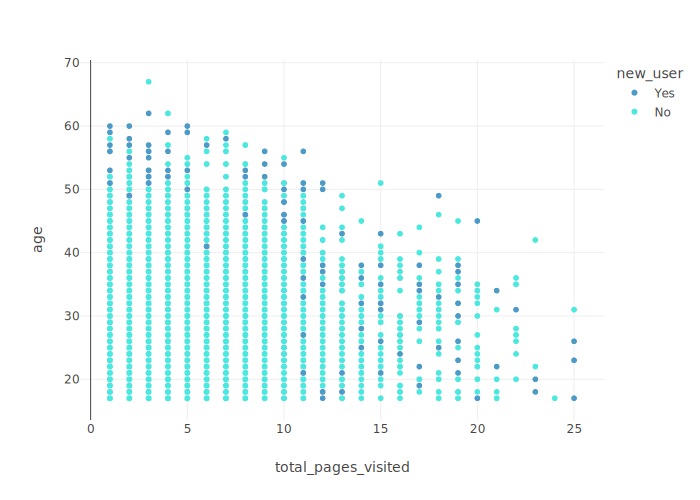

In [46]:
px.scatter(dataset_sample, x = 'total_pages_visited', y = 'age', color = dataset_sample['new_user'].astype('str'), labels = {'color': 'new_user'})

## Model

In [47]:
features_list = ['total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [48]:
X = dataset_sample.loc[:, features_list]
Y = dataset_sample.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [49]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [50]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[6]
 [2]
 [1]
 [4]
 [4]]
[[7]
 [7]]

[0 0 0 0 0]
[0 0]


### Training pipeline


In [51]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.3241096 ]
 [-0.85925202]
 [-1.15509243]
 [-0.26757121]
 [-0.26757121]]


In [52]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [53]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



### Test pipeline

In [54]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.61995   ]
 [ 0.61995   ]
 [ 0.91579041]
 [ 0.02826919]
 [-1.15509243]]


In [55]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0

### Performance assessment

In [56]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7106227106227107
f1-score on test set :  0.746268656716418


In [57]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[8648   29]
 [ 129  194]]

Confusion matrix on test set : 
[[958   3]
 [ 14  25]]



## Let's try another ML model

In [58]:
ds2 = pd.read_csv('conversion_data_train.csv')

In [59]:
ds2_sample = ds2.sample(10000)

In [60]:
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
numeric_indices = [1,4]
categorical_indices = [0,2,3]
target_variable = 'converted'

In [61]:
#separating fetaures from target variable
X = ds2_sample.loc[:, features_list]
Y = ds2_sample.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [62]:
# Divide dataset into Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [63]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['US' 27 0 'Ads' 1]
 ['UK' 35 0 'Ads' 14]
 ['US' 33 0 'Seo' 10]
 ['US' 51 1 'Direct' 3]
 ['US' 26 1 'Seo' 8]]
[['UK' 29 1 'Ads' 5]
 ['US' 27 1 'Seo' 1]]

[0 1 0 0 0]
[0 0]


In [64]:
# Create pipeline for numeric features

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns median
    ('scaler', StandardScaler()) #normalization of quantitative features around the mean
])

# Create pipeline for categorical features

categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [65]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)
    ])

In [66]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions

print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
[['US' 27 0 'Ads' 1]
 ['UK' 35 0 'Ads' 14]
 ['US' 33 0 'Seo' 10]
 ['US' 51 1 'Direct' 3]
 ['US' 26 1 'Seo' 8]]
...Done.
[[-0.42813464 -1.17478711  0.          0.          1.          0.
   0.          0.        ]
 [ 0.54735815  2.79473301  0.          1.          0.          0.
   0.          0.        ]
 [ 0.30348495  1.5733422   0.          0.          1.          0.
   0.          1.        ]
 [ 2.49834372 -0.56409171  0.          0.          1.          1.
   1.          0.        ]
 [-0.55007124  0.9626468   0.          0.          1.          1.
   0.          1.        ]]

Performing preprocessings on test set...
[['UK' 29 1 'Ads' 5]
 ['US' 27 1 'Seo' 1]
 ['UK' 35 1 'Direct' 4]
 ['US' 38 1 'Seo' 6]
 ['US' 37 1 'Seo' 2]]
...Done.
[[-0.18426144  0.04660369  0.          1.          0.          1.
   0.          0.        ]
 [-0.42813464 -1.17478711  0.          0.          1.          1.
   0.          1.        ]
 [ 0.54735815 -0.25874401 

### Random Forest

In [67]:
# Perform grid search
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, 100]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 40}
Best validation accuracy :  0.9898750465644158


In [68]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 1 0 ... 0 0 0]



In [69]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [70]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))                              
print()

f1-score on training set :  0.8102564102564103
f1-score on test set :  0.7272727272727274



The best result is on the random forest model

In [71]:
# Concatenate our train and test set to train the best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

RandomForestClassifier()

In [72]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [73]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")
print("Performing preprocessings on test set without labels...")
print(X_without_labels[0:5,:])
X_without_labels = preprocessor.transform(X_without_labels)
print('...Done.')
print(X_without_labels[0:5,:])
print()

Encoding categorical features and standardizing numerical features...
Performing preprocessings on test set without labels...
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]
...Done.
[[-0.30619804  3.40542841  0.          1.          0.          0.
   0.          1.        ]
 [-1.03781763  0.04660369  0.          1.          0.          1.
   1.          0.        ]
 [ 0.18154835 -1.17478711  0.          0.          0.          1.
   0.          1.        ]
 [ 0.18154835  0.35195139  0.          0.          1.          1.
   0.          0.        ]
 [-0.67200784 -0.56409171  0.          0.          0.          0.
   0.          1.        ]]



In [74]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('test_predictions_random_forest_all.csv', index=False)

In [75]:
converted = dataset[dataset['converted'] == 1]

In [76]:
print(converted.dtypes)
print(converted.head(20))

country                object
age                     int64
new_user               object
source                 object
total_pages_visited     int64
converted               int64
dtype: object
     country  age new_user  source  total_pages_visited  converted
2    Germany   20       No     Seo                   14          1
12   Germany   27      Yes     Ads                   14          1
42        UK   27       No     Seo                   16          1
127       US   32      Yes     Seo                   19          1
200       US   41       No     Seo                   20          1
207       UK   26      Yes     Ads                   15          1
234       UK   20       No     Ads                   21          1
308       US   36      Yes     Seo                   14          1
312       US   24       No     Seo                   21          1
323  Germany   28       No     Seo                   16          1
338       US   29       No  Direct                   23          1
36